In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
car_data=pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
car_data=car_data.drop('car_ID',axis=1)

In [ ]:
car_data_null = car_data.isna().mean().round(4) * 100

car_data_null.sort_values(ascending=False).head()


In [ ]:
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=car_data[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
car_data.shape

In [ ]:
car_data['CarName'].unique()

In [ ]:
car_data['symboling'] = car_data['symboling'].astype(str)

In [ ]:
car_data.loc[car_data.duplicated()]

In [ ]:
cat_col = car_data.select_dtypes(include=['object']).columns
num_col = car_data.select_dtypes(exclude=['object']).columns
car_data_cat = car_data[cat_col]
car_data_num = car_data[num_col]


In [ ]:
plt.rcParams['figure.figsize'] = [15,8]
ax=car_data['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

In [ ]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(car_data['price'])

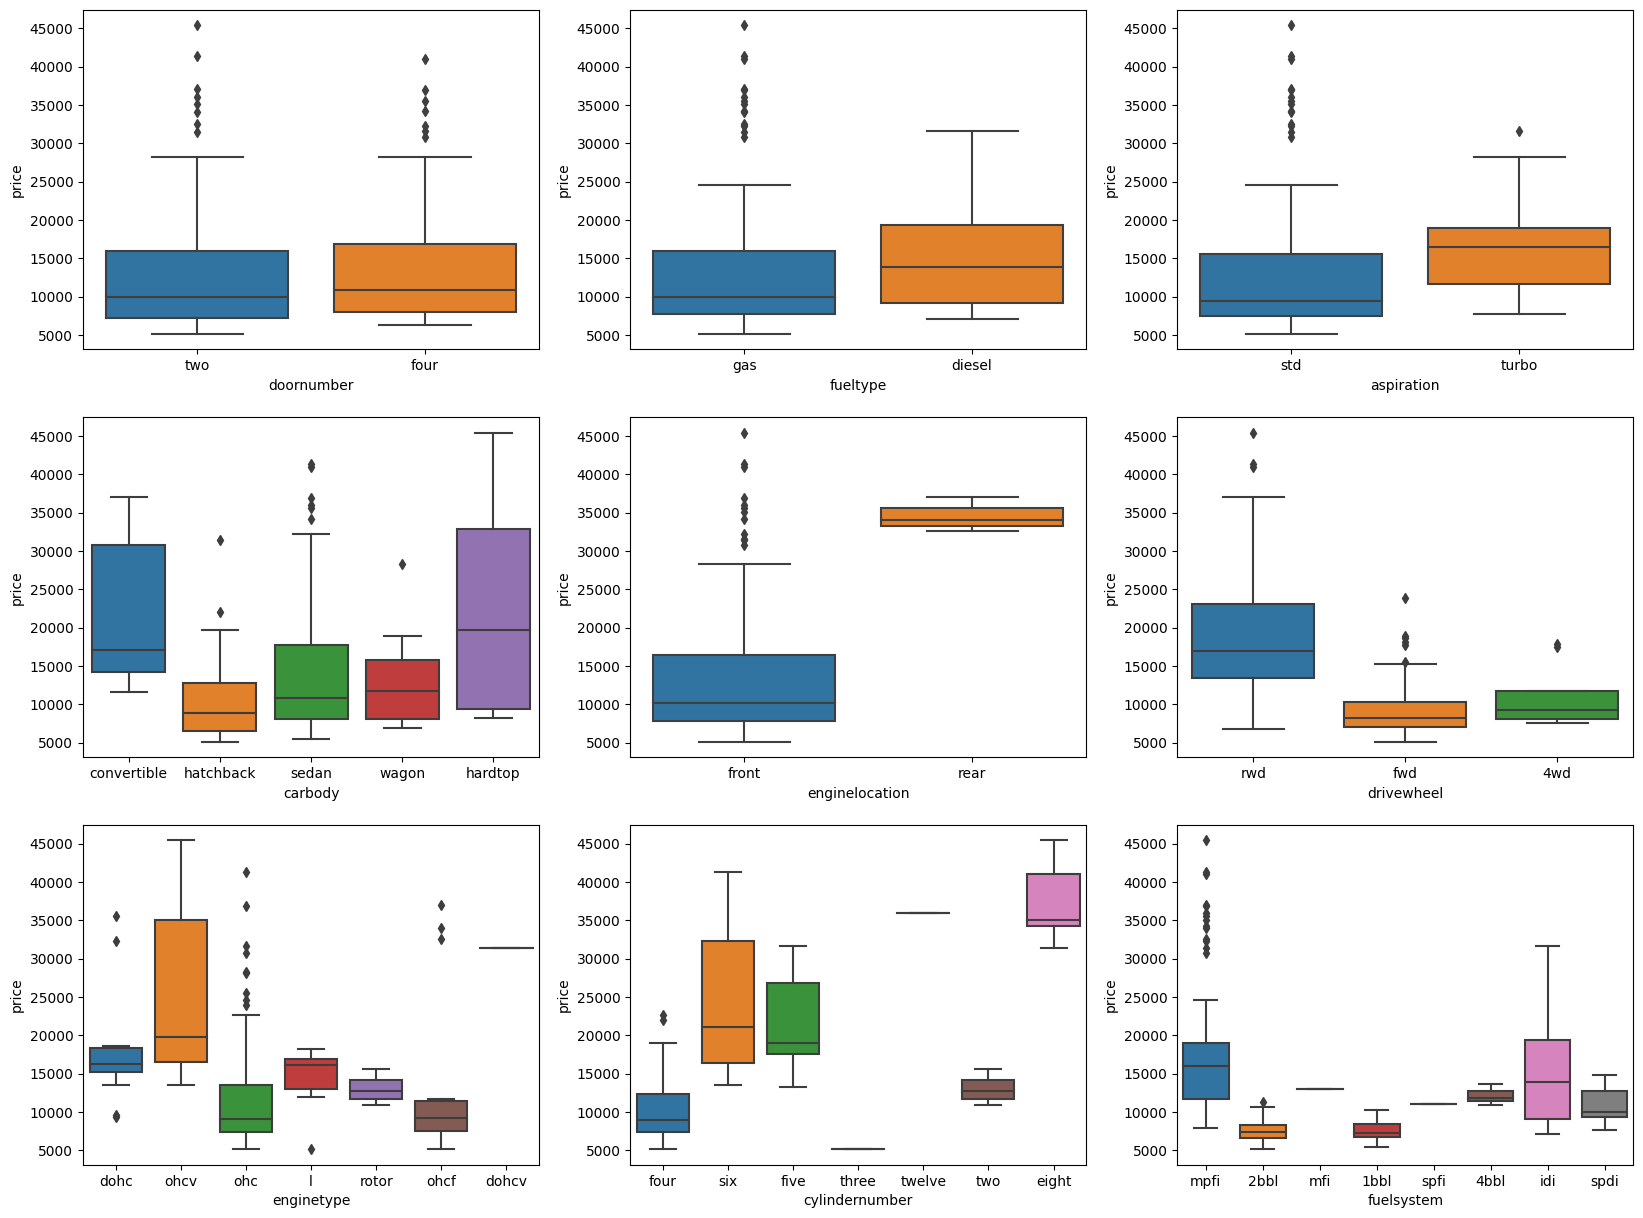

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_data)
plt.show()

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = car_data)
plt.show()

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = car_data)
plt.show()

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = car_data)
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))

df = pd.DataFrame(car_data.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))

car_data = pd.DataFrame(car_data.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
car_data.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
car_data['price'] = car_data['price'].astype('int')
car_data_temp = car_data.copy()
t = car_data_temp.groupby(['CarName'])['price'].mean()
car_data_temp = car_data_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(car_data_temp['price_y'],bins,right=False,labels=label)
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
sns.heatmap(car_data.corr(), cmap="RdYlGn")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm

In [ ]:
X = car_data.drop("price",axis = 1 )
y = car_data["price"]

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 15062001 )

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(110, 0)
(37, 0)
(110,)
(37,)


In [ ]:
import statsmodels.api as sm


X_train = [[1], [2], [3], [4], [5]]
y_train = [2, 4, 6, 8, 10]


X_train_c = sm.add_constant(X_train)


lr = sm.OLS(y_train, X_train_c).fit()


print(lr.params)


In [ ]:
import matplotlib.pyplot as plt


X_train = [[1], [2], [3], [4], [5]]
y_train = [2, 4, 6, 8, 10]

X_train_c = sm.add_constant(X_train)


lr = sm.OLS(y_train, X_train_c).fit()


plt.plot(X_train_c[:, 1], lr.params[0] + lr.params[1] * X_train_c[:, 1], 'r')


plt.show()



In [ ]:
import statsmodels.api as sm


X_train = [[1], [2], [3], [4], [5]]
y_train = [2, 4, 6, 8, 10]


X_train_c = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_c).fit()


print(lr.summary())


In [ ]:
import statsmodels.api as sm


X_train = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]
y_train = [2, 4, 6, 8, 10]


selector = RFE(estimator=LinearRegression(), n_features_to_select=2)
selector.fit(X_train, y_train)
X_train_rfe2 = selector.transform(X_train)


X_train_rfe2c = sm.add_constant(X_train_rfe2)

lr_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()


y_train_price = lr_rfe2.predict(X_train_rfe2c)

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [ ]:
from sklearn.preprocessing import StandardScaler


car_data_test = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6], 'col3': [7, 8, 9]})
sig_num_col = ['col1', 'col2', 'col3']


scaler = StandardScaler()


car_data_test[sig_num_col] = scaler.fit_transform(car_data_test[sig_num_col])


print(car_data_test.shape)

In [ ]:
car_data_test = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6], 'price': [7, 8, 9]})


y_test = car_data_test.pop('price')


X_test = car_data_test



In [ ]:
import statsmodels.api as sm


X_train = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]
y_train = [2, 4, 6, 8, 10]


selector = RFE(estimator=LinearRegression(), n_features_to_select=2)
selector.fit(X_train, y_train)
X_train_rfe2 = selector.transform(X_train)


X_train_rfe2c = sm.add_constant(X_train_rfe2)


X_test = [[1, 3], [2, 6], [3, 9], [4, 12], [5, 15]]


X_test_1 = sm.add_constant(X_test)


import numpy as np


arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])


mask = np.array([True, False, True])


new_arr = arr[:, mask]



In [ ]:
import statsmodels.api as sm


X_train = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]
y_train = [2, 4, 6, 8, 10]


# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=10, n_informative=5, random_state=1)

# Create an RFE object with LinearRegression estimator and 5 features to select
selector = RFE(estimator=LinearRegression(), n_features_to_select=5)

# Fit the RFE object to the dataset
selector.fit(X, y)


print(selector.support_)
# [ True False  True  True False False  True False  True False]


print(selector.ranking_)
# [1 6 1 1 2 4 1 3 1 5]

selector.fit(X_train, y_train)
X_train_rfe2 = selector.transform(X_train)

X_train_rfe2c = sm.add_constant(X_train_rfe2)


lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()


X_test = [[1, 3], [2, 6], [3, 9], [4, 12], [5, 15]]

X_test_new = selector.transform(X_test)
X_test_newc = sm.add_constant(X_test_new)


y_pred = lm_rfe2.predict(X_test_newc)


[False  True  True  True False  True False False False  True]
[6 1 1 1 2 1 4 3 5 1]


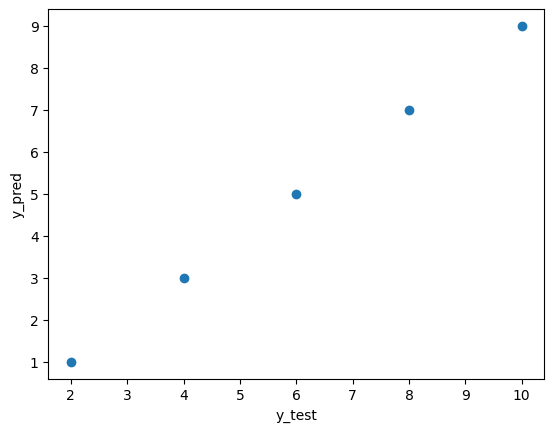

Text(0, 0.5, 'y_pred')

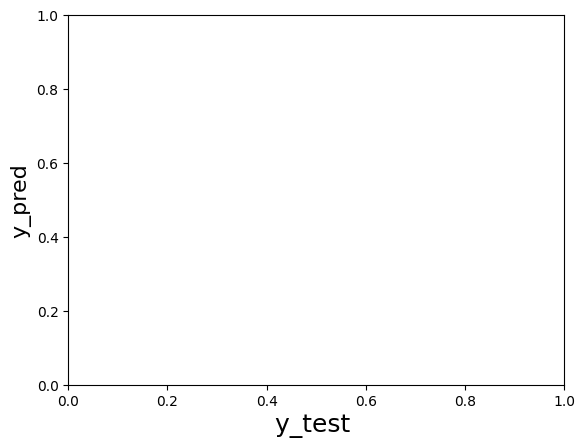

In [ ]:
fig = plt.figure()
import matplotlib.pyplot as plt


y_test = [2, 4, 6, 8, 10]
y_pred = [1, 3, 5, 7, 9]


plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [ ]:
from sklearn.metrics import r2_score


from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, random_state=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(r2)


1.0
